# Project: WeRateDogs Data Wrangling and Analysis
## By: Baki Musa Oladayo

## **Introduction**

WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though Almost always greater than 10. 11/10, 12/10, 13/10, etc. This project focused on the wrangling of WeRateDogs datas. The data was gathered from three sources, the main dataset which is twitter-archive-enhanced dataset which contains the tweet text and the dog pictures ratings, image prediction dataset  that contains the tweet image URL and the predictions and tweet_Json which contain favorite_count and retweet_count. The three dataset was merged to twitter_archive_master dataset after data assessment and cleaning using pandas methods and functions. twitter_archive_master was analyzed and visualized and various dataset insight was brought out with analysis.

## Data Gathering


In [1]:
import requests
import pandas as pd
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**1. Reading direct downloaded twitter_archive_enhanced.csv into pandas dataframe**

In [2]:
tweet_arch_df = pd.read_csv('twitter-archive-enhanced.csv', sep= ',')
tweet_arch_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [3]:
tweet_arch_df.shape

(2356, 17)

**2. Using Requests library to download the tweet image prediction (image_predictions.tsv)**

In [4]:
#Downloading image_predictions.tsv file hosted on Udacity's servers programmatically using Requests library 
file_url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv' 
r = requests.get(file_url, allow_redirects= True)
open('image_predictions.tsv', 'wb').write(r.content)

335079

In [5]:
#Reading image_predictions.tsv into pandas dataframe 
image_predic_df= pd.read_csv('image_predictions.tsv', sep ='\t')
image_predic_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
image_predic_df.shape

(2075, 12)

**3. Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt)**

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = tweet_arch_df.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_jsons.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [9]:
#Reading openfile line by line and load it as json
list_tweets =[]
with open('tweet_json.txt', 'r', encoding='utf-8') as openfile:
    for line in openfile:
        data = json.loads(line)
        list_tweets.append(data)

In [10]:
#Reading to a dataframe
tweets_df= pd.DataFrame(list_tweets, columns= ['id', 'retweet_count', 'favorite_count'])
tweets_df.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [11]:
tweets_df.shape

(2354, 3)

In [12]:
#save tweets_df to csv
tweets_df.to_csv('tweet_json.csv', index= False)

## Data Assessment

In [13]:
#twitter-archive-enhanced table's display
tweet_arch_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


twitter-archive-enhanced columns:

 - **tweet_id**: unique 64-bit unsigned integers assigned to all tweet
 - **in_reply_to_status_id**: the ID of the status being replied to.    
 - **in_reply_to_user_id**: the ID of the user being replied to.       
 - **timestamp**: digital record of the time of the tweet                  
 - **source**: the source of the status.                    
 - **text**: the text of the status.                       
 - **retweeted_status_id**: the ID of the status retweeted.        
 - **retweeted_status_user_id**: the ID of the user retweeted     
 - **retweeted_status_timestamp**: digital record of the time of the retweet  
 - **expanded_urls**: the URL of the source of the status.              
 - **rating_numerator**: numerator of unique rating system of we_rate_dogs
 - **rating_denominator**: denominator of unique rating system which are 10
 - **name**: the dogs name                         
 - **doggo**: dog stage for big pupper usually older than pupper        
 - **floofer**: can be any dog, the label is commonly given to dogs with seemingly excess fur                  
 - **pupper**: dog stage for a small doggo usually younger but can be equally if not mature than some doggo                      
 - **puppo**: dog stage for a transitional phase between doggo and pupper.

In [14]:
#image_predictions table's display
image_predic_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


image_predictions columns:

- **tweet_id**: unique 64-bit unsigned integers assigned to all tweet
- **jpg_url**:  web address that specifies location of the dogs image
- **img_num**:  no of image on the tweet
- **p1**: is the algorithm's #1 prediction for the image in the tweet
- **p1_conf**: is how confident the algorithm is in its #1 prediction
- **p1_dog**:  is whether or not the #1 prediction is a breed of dog  
- **p2**: is the algorithm's second most likely prediction
- **p2_conf**: is how confident the algorithm is in its #2 prediction
- **p2_dog**: is whether or not the #2 prediction is a breed of dog   
- **p3**: is the algorithm's third most likely prediction     
- **p3_conf**:is how confident the algorithm is in its #3 prediction
- **p3_dog**: is whether or not the #3 prediction is a breed of dog   

In [15]:
#tweet_json table's display
tweets_df.head(3)

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461


tweet_json columns:

- **id**: is a unique 64-bit unsigned integers assigned to all tweet
- **retweet_count**: the number of retweets of the status.
- **favorite_count**: the number of likes of the status.

**Visual Assessment**

Visual assessment of the three dataset was done using microsoft excel. the dataset was assess and some quality issues and tidiness was notice and documented.   

**Assessing data programatically**

In [16]:
tweet_arch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
image_predic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [19]:
tweet_arch_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
image_predic_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [21]:
tweets_df.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [22]:
sum(tweet_arch_df.duplicated())

0

In [23]:
sum(image_predic_df.duplicated())

0

In [24]:
sum(tweets_df.duplicated())

0

In [25]:
all_columns = pd.Series(list(tweet_arch_df) + list(image_predic_df))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

### Quality issues
**twitter-archive-enhanced table**
1. wrong or missing dog_names and dog_stage 
2. retweeted data are redundant to the analysis.
3. replied data are redundant to the analysis
4. rating_denominator wrongly tweeted and captured (not 10 which is the actual rating denominator)
5. wrongly picked rating_numerator in tweet_id 786709082849828000 (9.75), 883482846933004000 (13.5), 680494726643068000 (11.26) and 778027034220126000 (11.27). After decimal value was picked
6. timestamp datatype is an object and not datetime
7. Erroneous datatypes (tweet_id, timestamp, rating_numerator)
8. tweet without image are redundant to the analysis
**image_predictions table**

9. in image_pred_df some predictions contains 3 false , which means those are useless prediction data.

### Tidiness issues
**twitter-archive-enhanced table**
1. ddoggo, floofer, pupper and puppo columns are to be merged to form **dog_stage** column
2. drop expanded_urls, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id and source which are redundant to the analysis.
3. matching the three (3) dataset to twitter_archive_master dataset 

## Cleaning Data

In [26]:
# copies of original pieces of data
tweet_arch_df_clean = tweet_arch_df.copy()
image_predic_df_clean = image_predic_df.copy()
tweets_df_clean = tweets_df.copy()

### Issue #1:

#### Define: 

**wrong/missing dog_names and dog_stage**
missing dog names have no importance to my analysis and i choose not to clean the wrongly picked one and unprovided.
missing dog_stage are important to the analysis but unfortunatly they are not included in the text and can not be retrieve. 

### Issue #2:

#### Define: 

doggo, floofer, pupper and puppo columns which represent dog_stage was combined. firstly, i removed "None" using replace() method then combined all the columns to form **dog_stage** column using lambda function. i seperately merged dog_stage with coma(,) using .loc[] and then drop doggo, pupper, puppo and floofer columns with drop() method.

#### Code

In [27]:
#removing all the None value in doggo, pupper, puppo and floofer columns
tweet_arch_df_clean= tweet_arch_df_clean.replace(['None'], [''], regex=True)

In [28]:
#combine doggo, pupper, puppo and floofer columns to form dog_stage columns
tweet_arch_df_clean['dog_stage'] = tweet_arch_df_clean[tweet_arch_df_clean.columns[13:]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1)

In [29]:
#seperating dog_stage combine together i.e doggopupper with coma(,)
tweet_arch_df_clean.loc[tweet_arch_df_clean.dog_stage == 'doggopupper', 'dog_stage'] ='doggo, pupper'
tweet_arch_df_clean.loc[tweet_arch_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
tweet_arch_df_clean.loc[tweet_arch_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [30]:
#dropping doggo, pupper, puppo and floofer columns
columns= ['doggo', 'floofer', 'pupper', 'puppo']
tweet_arch_df_clean.drop(columns, inplace=True, axis=1)

#### Test

In [31]:
tweet_arch_df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,


In [32]:
tweet_arch_df_clean.dog_stage.value_counts()

                  1976
pupper             245
doggo               83
puppo               29
doggo, pupper       12
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: dog_stage, dtype: int64

### Issue #3:

#### Define

Removing retweet_rows which are redundant to the analysis. firstly, list all the retweeted rows with list() function and drop them with drop() method.

#### Code

In [33]:
#removing the retweet_rows
retweets_rows = list(tweet_arch_df_clean[tweet_arch_df_clean["retweeted_status_id"].isnull()==False].index)

tweet_arch_df_clean.drop(axis=0, index=retweets_rows, inplace=True)

#### Test

In [34]:
tweet_arch_df_clean.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

### Issue #4:

#### Define

Removing reply_rows which are redundant to the analysis. firstly, list all the reply rows with list() function and drop them with drop() method.

#### Code

In [35]:
#removing the reply_rows
reply_rows = list(tweet_arch_df_clean[tweet_arch_df_clean["in_reply_to_user_id"].isnull()==False].index)

tweet_arch_df_clean.drop(axis=0, index=reply_rows, inplace=True)

#### Test

In [36]:
tweet_arch_df_clean.in_reply_to_user_id.value_counts()

Series([], Name: in_reply_to_user_id, dtype: int64)

### Issue #5:

#### Define

Dropping columns not needed for the analysis (**expanded_urls, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id and source colums**). this was done using drop() method

#### Code

In [37]:
columns= ['expanded_urls', 'retweeted_status_id', 'source', 'retweeted_status_user_id', 'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id']
tweet_arch_df_clean.drop(columns, inplace=True, axis=1)

#### Test

In [38]:
tweet_arch_df_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,


### Issue #6:

#### Define

rating_denominator wrongly tweeted and captured (!= 10 which is actual rating denominator). i firstly list all the rating_denominator not equal to ten (10) using list() function then drop them with drop() method. 

#### Code

In [39]:
not_equal_ten = list(tweet_arch_df_clean.query("rating_denominator != 10").index)
tweet_arch_df_clean.drop(index=not_equal_ten, inplace=True)

#### Test

In [40]:
tweet_arch_df_clean.query("rating_denominator != 10").index

Int64Index([], dtype='int64')

### Issue #7:

#### Define

Erroneous datatypes (tweet_id, timestamp, rating_numerator). changed the data type of timestamp which is an object, to datetime for proper analysis and rating_numerator data_type to float to contain float type value. also, i changed data_type of all dataset tweet_id from integer to string to repesent the true nature of the data using astype() function

#### Code

In [41]:
#changing data_type of timestamp & rating_numerator to datetime and float respectively
tweet_arch_df_clean.timestamp = tweet_arch_df_clean.timestamp.astype('datetime64')
tweet_arch_df_clean.rating_numerator = tweet_arch_df_clean.rating_numerator.astype(float)

In [42]:
#changing tweet_id data_type of the three (3) dataset to string datatype 
tweet_arch_df_clean.tweet_id = tweet_arch_df_clean.tweet_id.astype(str)
image_predic_df_clean.tweet_id = image_predic_df_clean.tweet_id.astype(str)
tweets_df_clean.id = tweets_df_clean.id.astype(str)

#### Test

In [43]:
tweet_arch_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2080 non-null   object        
 1   timestamp           2080 non-null   datetime64[ns]
 2   text                2080 non-null   object        
 3   rating_numerator    2080 non-null   float64       
 4   rating_denominator  2080 non-null   int64         
 5   name                2080 non-null   object        
 6   dog_stage           2080 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 130.0+ KB


In [44]:
image_predic_df_clean.tweet_id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2075 entries, 0 to 2074
Series name: tweet_id
Non-Null Count  Dtype 
--------------  ----- 
2075 non-null   object
dtypes: object(1)
memory usage: 16.3+ KB


In [45]:
tweets_df_clean.id.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2354 entries, 0 to 2353
Series name: id
Non-Null Count  Dtype 
--------------  ----- 
2354 non-null   object
dtypes: object(1)
memory usage: 18.5+ KB


### Issue #8:

#### Define

wrongly picked rating_numerator in tweet_id 786709082849828000 (9.75), 883482846933004000 (13.5), 680494726643068000 (11.26) and 778027034220126000 (11.27). After decimal value was picked. firstly, a column name actual_numerator was created for the wrongly picked values extracted from the test column using extract() function and then i created a list and use for-loop to check and repalace the error then drop actual_numerator column

#### Code

In [46]:
#creation of column for the wrongly picked
tweet_arch_df_clean['actual_numerator'] = tweet_arch_df_clean.text.str.extract(r"([0-9]+[.][0-9]+/[0-9]+)")

In [47]:
#listing the wrongly picked using list function and using for loop to the loop to the rating_numerator column
wrong_numerator= list(tweet_arch_df_clean[tweet_arch_df_clean['actual_numerator'].isnull()==False].index)
for i in wrong_numerator:
    tweet_arch_df_clean.rating_numerator[i] = float(tweet_arch_df_clean.actual_numerator[i][:-3])

C:\Users\ADRON AUDIT 2\AppData\Local\Temp\ipykernel_12344\3895507631.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweet_arch_df_clean.rating_numerator[i] = float(tweet_arch_df_clean.actual_numerator[i][:-3])


In [48]:
#deleting created actual_numerator column using drop function
tweet_arch_df_clean.drop("actual_numerator", axis=1, inplace= True)


#### Test

In [49]:
for i in wrong_numerator:
    print(tweet_arch_df_clean.rating_numerator[i])

13.5
9.75
11.27
11.26


In [50]:
 tweet_arch_df_clean.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10,Phineas,
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10,Darla,
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10,Franklin,


### Issue #9:

#### Define

in image_predic_df_clean some predictions contains three (3) false , which means those are useless prediction data. i found the rows containing three false value using list() function and deleted them with drop() method.

#### Code

In [51]:
false_value = list(image_predic_df_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index)
image_predic_df_clean.drop(index=false_value,inplace=True)

### Test

In [52]:
image_predic_df_clean.query("p1_dog==False and p2_dog==False and p3_dog == False").index

Int64Index([], dtype='int64')

### Issue #10:

#### Define

merging the three (3) dataset to form twitter_archive_master dataset. firstly,  id column in tweets_df_clean was rename to tweet_id to match other dataset then i merged the 3 dataset at tweet_id using merge() method.

#### Code

In [53]:
#id of tweets_df_clean column rename to tweet_id
tweets_df_clean.rename(columns = {'id':'tweet_id'}, inplace = True)

In [54]:
#merging the three (3) dataset to from twitter_archive_master 
twitter_archive_master= tweet_arch_df_clean.merge(image_predic_df_clean, on= 'tweet_id').merge(tweets_df_clean, on= 'tweet_id')
twitter_archive_master.head(2)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10,Archie,,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461


#### Test

In [55]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650 entries, 0 to 1649
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1650 non-null   object        
 1   timestamp           1650 non-null   datetime64[ns]
 2   text                1650 non-null   object        
 3   rating_numerator    1650 non-null   float64       
 4   rating_denominator  1650 non-null   int64         
 5   name                1650 non-null   object        
 6   dog_stage           1650 non-null   object        
 7   jpg_url             1650 non-null   object        
 8   img_num             1650 non-null   int64         
 9   p1                  1650 non-null   object        
 10  p1_conf             1650 non-null   float64       
 11  p1_dog              1650 non-null   bool          
 12  p2                  1650 non-null   object        
 13  p2_conf             1650 non-null   float64     

## Storing Data

In [56]:
#stored the master dataset to a csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index= False)

## Analyzing and Visualizing Data

In [57]:
df= pd.read_csv('twitter_archive_master.csv')
df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1650 non-null   int64  
 1   timestamp           1650 non-null   object 
 2   text                1650 non-null   object 
 3   rating_numerator    1650 non-null   float64
 4   rating_denominator  1650 non-null   int64  
 5   name                1261 non-null   object 
 6   dog_stage           257 non-null    object 
 7   jpg_url             1650 non-null   object 
 8   img_num             1650 non-null   int64  
 9   p1                  1650 non-null   object 
 10  p1_conf             1650 non-null   float64
 11  p1_dog              1650 non-null   bool   
 12  p2                  1650 non-null   object 
 13  p2_conf             1650 non-null   float64
 14  p2_dog              1650 non-null   bool   
 15  p3                  1650 non-null   object 
 16  p3_con

In [58]:
df.tweet_id = df.tweet_id.astype(str)
df.describe()

,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,1650.000000,1650.0,1650.000000,1650.000000,1650.000000,1.650000e+03,1650.000000,1650.000000
mean,10.824715,10.0,1.214545,0.605364,0.137722,6.120605e-02,2835.764848,9314.908485
std,1.776857,0.0,0.574393,0.266540,0.101740,5.177029e-02,4840.817991,12680.926767
min,0.000000,10.0,1.000000,0.044333,0.000010,2.160900e-07,16.000000,81.000000
25%,10.000000,10.0,1.000000,0.378746,0.054806,1.554617e-02,649.250000,2163.250000
50%,11.000000,10.0,1.000000,0.606253,0.121553,4.990720e-02,1440.000000,4486.500000
75%,12.000000,10.0,1.000000,0.851579,0.199528,9.468462e-02,3264.000000,11752.750000
max,14.000000,10.0,4.000000,0.999984,0.467678,2.710420e-01,79515.000000,132810.000000


### Insights:
1. reaction to the rating system 

2. top retweeted dogs rating 

3. top beloved dogs (doggo, pupper, puppo or floofer)

4. most favorite breed of dogs

### Visualization

### **Reaction to the rating system**

C:\Users\ADRON AUDIT 2\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


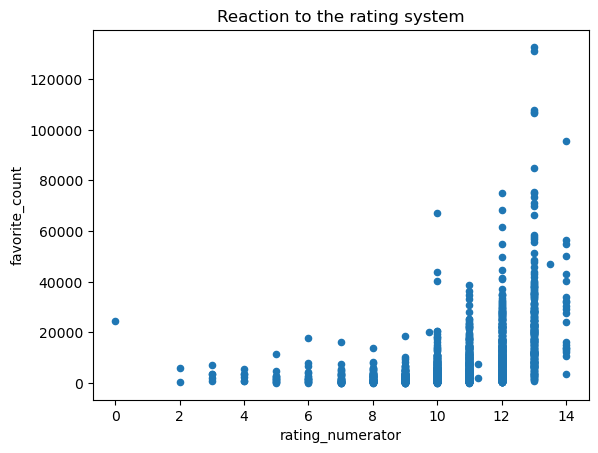

In [59]:
df.plot.scatter(x= 'rating_numerator', y= 'favorite_count')
plt.title("Reaction to the rating system")
plt.show();

The analysis using scattered graph, focused on the reaction of people towards WeRateDogs rating system. The independent variable is the rating_numerator while dependent variable is favorite_count. The graph shows that there is a low positive corelation between the variable, as the rating is increasing, people's likes keep increasing litle by litle until it reaches the peach and drop. 

### **top beloved dogs (doggo, pupper, puppo or floofer)**

In [60]:
df.groupby(['dog_stage']).favorite_count.sum().sort_values(ascending=False)

dog_stage
pupper            1259041
doggo             1047829
puppo              450614
doggo, pupper       97024
floofer             92442
doggo, puppo        47844
doggo, floofer      17169
Name: favorite_count, dtype: int64

The analysis focused on the people's likes as per dog_stages. the analysis shows the pupper is highly favored followed by doggo. 

### **Top retweeted dogs rating**

Text(0, 0.5, 'Retweet_count')

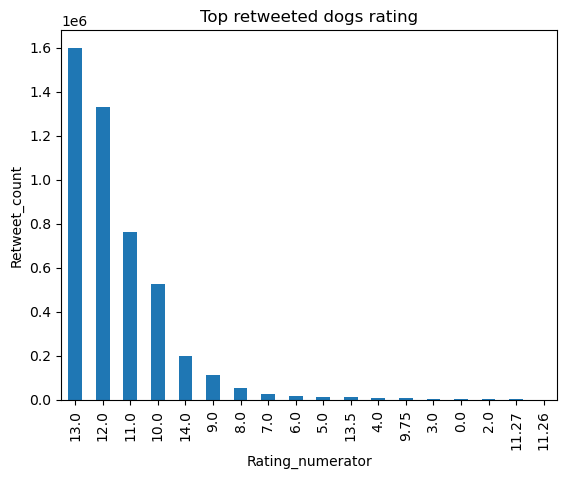

In [61]:
df.groupby(['rating_numerator']).retweet_count.sum().sort_values(ascending=False).plot(kind= 'bar')
plt.title('Top retweeted dogs rating')
plt.xlabel('Rating_numerator')
plt.ylabel('Retweet_count')

The analysis using bar chart, focused on the top retweeted dog rating. By the analysis 13/10 rating is most retweeted rating followed by 12/10 and 11/10.

### **most favorite breed of dogs**

Text(0.5, 1.0, 'Most favorite breed of dogs')

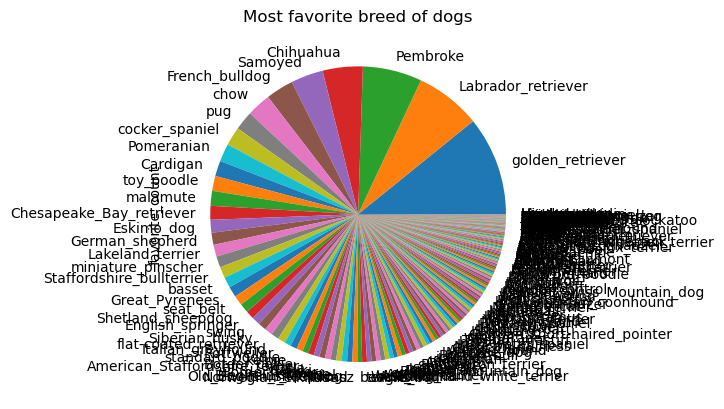

In [62]:
df.groupby(['p1']).favorite_count.sum().sort_values(ascending=False).plot(kind = 'pie')
plt.title("Most favorite breed of dogs")

 The analysis using pie chart, focused on the most favorite breed of dogs. Most liked is golden_retriever follow by labrador_retriever as displayed in the chart.

## **Conclusions**

With the analysis above i was able to discovered that WeRateDogs followers' reaction to their rating system is not a bad one as it was revealed with the analysis that the correlation between favorite_count and the rating system is positive. It was discovered that the best beloved dogs' stage is  pupper followed by doggo and discovered that the top retweeted rating is 13/10 followed by 12/10. Finally, it was discovered the most favorite breed of dogs is golden_retriever followed by labrador_retriever.

Limitation 
1. difficulties in setting up a developer account to use Tweepy to query Twitter's API. I was unable to get authorized, getting access is one of the difficulties i faced and delayed my project completion time.